### Correlation between Model Multiplicity and Mean of Absolute Differences

### Import libraries and set plotting style

In [7]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

sys.path.append('../scr')
from data_preprocessing import *
from analysis import *
from plot import *

 ### Feature Numbers and Model Types

In [2]:
feature_numbers = ['2', '7', '9']  
model_types = ['LP','RP','LB','RB']  

### Load CSV files

In [3]:
df_predictions = load_and_clean_predictions('compas','predictions',feature_numbers, model_types, data_path='../predictions/')

Loaded file: ../predictions/compas_predictions_2LP_1104_2259.csv for model 2LP
Loaded file: ../predictions/compas_predictions_2RP_nodate.csv for model 2RP
Loaded file: ../predictions/compas_predictions_2LB_nodate.csv for model 2LB
Loaded file: ../predictions/compas_predictions_2RB_nodate.csv for model 2RB
Loaded file: ../predictions/compas_predictions_7LP_nodate.csv for model 7LP
Loaded file: ../predictions/compas_predictions_7RP_nodate.csv for model 7RP
Loaded file: ../predictions/compas_predictions_7LB_nodate.csv for model 7LB
Loaded file: ../predictions/compas_predictions_7RB_nodate.csv for model 7RB
Loaded file: ../predictions/compas_predictions_9LP_nodate.csv for model 9LP
Loaded file: ../predictions/compas_predictions_9RP_nodate.csv for model 9RP
Loaded file: ../predictions/compas_predictions_9LB_nodate.csv for model 9LB
Loaded file: ../predictions/compas_predictions_9RB_nodate.csv for model 9RB


### Mean of Absolute Differences

\begin{align}
{\text{Mean of Absolute Differences}} = \frac{1}{N} \sum_{i=1}^{N} \left| M_i^{F_1, T}(x) - M_i^{F_2, T}(x) \right|
\text{,} \quad F_1 \neq F_2  \notag
\end{align}


In [4]:
mean_of_abs_diff_df = {}
suffixes = ['LM', 'RM', 'LM', 'RM']

for model_type, suffix in zip(model_types, suffixes):
    abs_diff_2vs7 = compute_row_stats(
        compute_absolute_difference(
            df_predictions['2'][model_type], 
            df_predictions['7'][model_type], 
            substring_1=f'2{suffix}', 
            substring_2=f'7{suffix}'
        )
    )['mean']
    
    abs_diff_2vs9 = compute_row_stats(
        compute_absolute_difference(
            df_predictions['2'][model_type], 
            df_predictions['9'][model_type], 
            substring_1=f'2{suffix}', 
            substring_2=f'9{suffix}'
        )
    )['mean']
    
    mean_of_abs_diff_df[model_type] = pd.DataFrame({
        'abs_diff_2vs7': abs_diff_2vs7,
        'abs_diff_2vs9': abs_diff_2vs9
    })

combined_mean_of_abs_diff_df = pd.concat(mean_of_abs_diff_df, axis=1)

#print(combined_mean_of_abs_diff_df)

In [5]:
#print(combined_mean_of_abs_diff_df)
#print(combined_mean_of_abs_diff_df['LB']['abs_diff_2vs9'])

### Probabilities

Correlation between Model Multiplicity of lower feature set Model and Absolute Mean Differences
- (2LP vs. 7LP) and 2LP Model Multiplicity
- (2RP vs. 7RP) and 2RP Model Multiplicity 

- (2LP vs. 9LP) and 2LP Model Multiplicity
- (2RP vs. 9RP) and 2RP Model Multiplicity

Correlation between Model Multiplicity (2LP) and Mean of Absolute Differences (2LP vs. 7LP)
Correlation coefficient: -0.02103964594319909


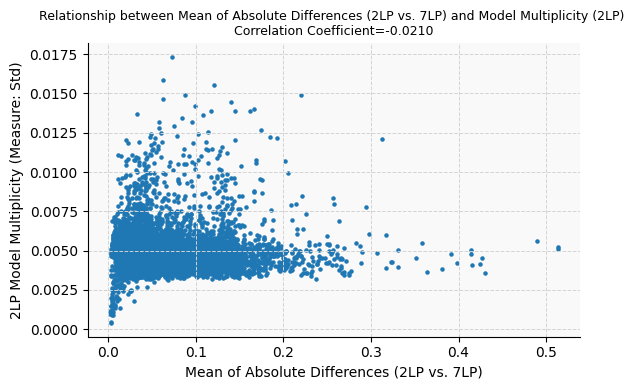

Correlation between Model Multiplicity (2LP) and Mean of Absolute Differences (2LP vs. 9LP)
Correlation coefficient: -0.02117358126963978


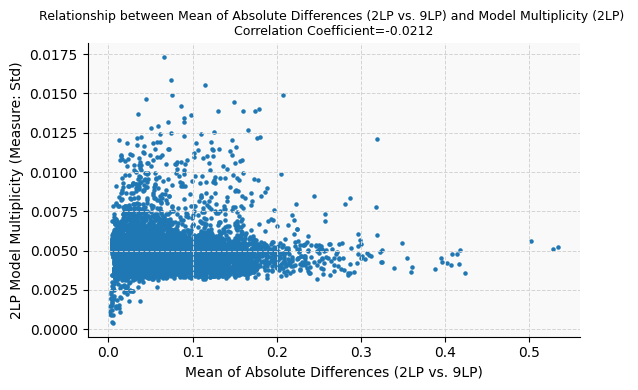

Correlation between Model Multiplicity (2RP) and Mean of Absolute Differences (2RP vs. 7RP)
Correlation coefficient: 0.18610932986268391


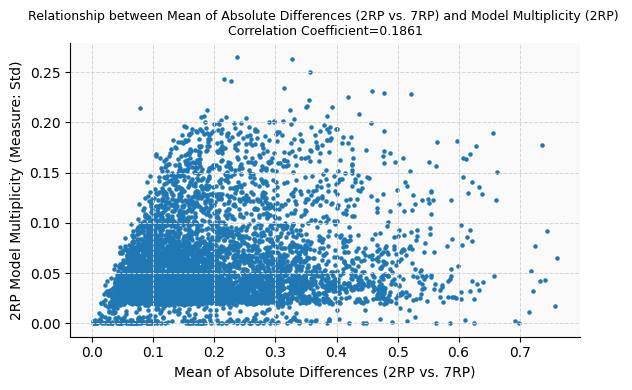

Correlation between Model Multiplicity (2RP) and Mean of Absolute Differences (2RP vs. 9RP)
Correlation coefficient: 0.13537207867015316


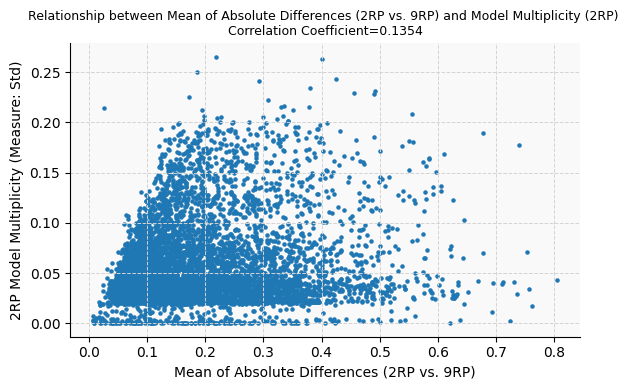

In [10]:
model_types_P = ['LP', 'RP']
for model_type in model_types_P:
    correl_multiplicity_differences(
        df_predictions=df_predictions,
        combined_mean_of_abs_diff=combined_mean_of_abs_diff_df,
        model_type=model_type, 
        std='std', 
        abs_diff_keys=['2vs7', '2vs9'], 
        comparison_labels=[f'2{model_type} vs. 7{model_type}', f'2{model_type} vs. 9{model_type}'],
        primary_model='2',  
        dynamic_base_model=False  
    )



Correlation between Model Multiplicity of Higher Feature Set Model and Absolute Mean Differences
- (2LP vs. 7LP) and 7LP Model Multiplicity
- (2RP vs. 7RP) and 7RP Model Multiplicity 

- (2LP vs. 9LP) and 7LP Model Multiplicity
- (2RP vs. 9RP) and 7RP Model Multiplicity 

Correlation between Model Multiplicity (7LP) and Mean of Absolute Differences (2LP vs. 7LP)
Correlation coefficient: 0.44706559661248635


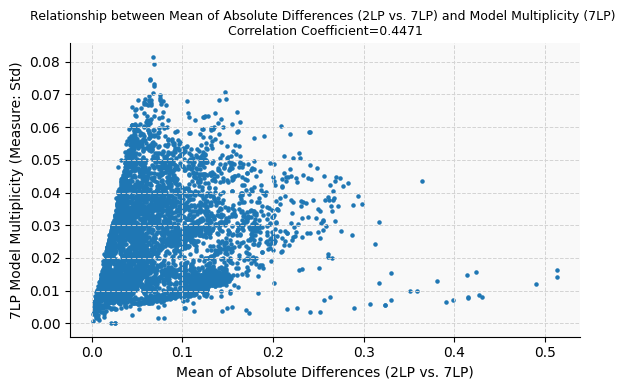

Correlation between Model Multiplicity (9LP) and Mean of Absolute Differences (2LP vs. 9LP)
Correlation coefficient: 0.39525718481969435


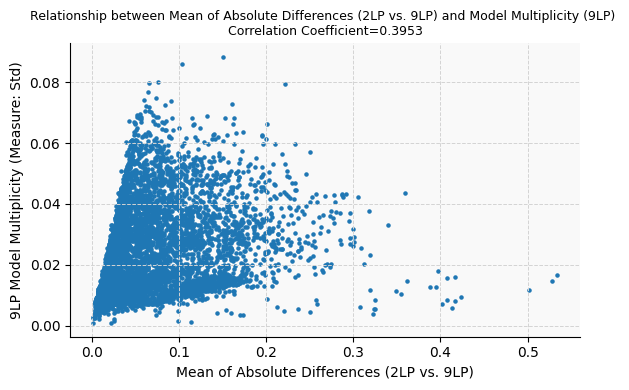

Correlation between Model Multiplicity (7RP) and Mean of Absolute Differences (2RP vs. 7RP)
Correlation coefficient: 0.22812345548819296


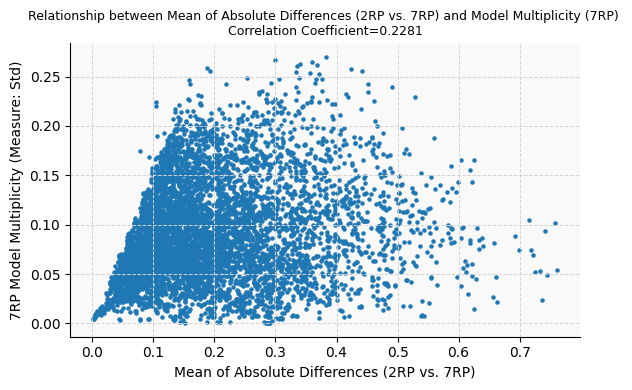

Correlation between Model Multiplicity (9RP) and Mean of Absolute Differences (2RP vs. 9RP)
Correlation coefficient: 0.2179723524614375


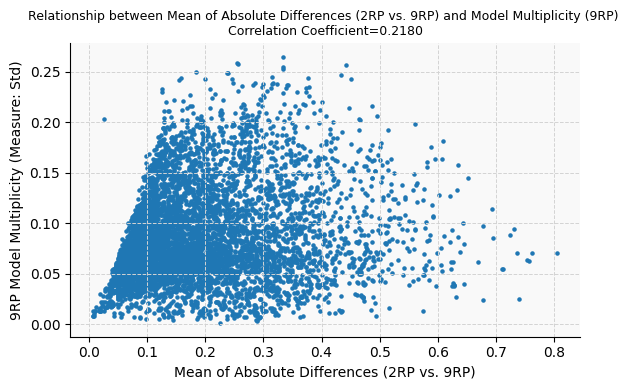

In [11]:
for model_type in model_types_P:
    correl_multiplicity_differences(
        df_predictions=df_predictions,
        combined_mean_of_abs_diff=combined_mean_of_abs_diff_df,
        model_type=model_type, 
        std='std', 
        abs_diff_keys=['2vs7', '2vs9'], 
        comparison_labels=[f'2{model_type} vs. 7{model_type}', f'2{model_type} vs. 9{model_type}'],
        primary_model='2',  
        dynamic_base_model=True  
    )


Correlation between Model Multiplicity of Higher Feature Set Model and Absolute Mean Differences

- (2LP vs. 7LP) and 7LP Model Multiplicity
- (2RP vs. 7RP) and 7RP Model Multiplicity 

- (2LP vs. 9LP) and 9LP Model Multiplicity
- (2RP vs. 9RP) and 9RP Model Multiplicity 

### Binary values

### Agreement (Model Multiplicity Measure)

1. Number of models that predict 1:
\begin{align}
S_1 = \sum_{i=1}^{N} p_i 
\end{align}

2. Number of models that predict 0:
\begin{align}
S_0 = N - S_1 
\end{align}

3. Proportion of models agreeing with the majority prediction:
\begin{align}
\text{Agreement} = \max\left( \frac{S_1}{N}, \frac{S_0}{N} \right)
\end{align}

In [12]:
model_multiplicity_LB = {}
model_multiplicity_RB = {}


for feature_number in feature_numbers:
    model_multiplicity_LB[feature_number], _, _ = compute_binary_model_multiplicity(df_predictions, feature_number, column='LB')
    model_multiplicity_RB[feature_number], _, _ = compute_binary_model_multiplicity(df_predictions, feature_number, column='RB')


   ID     S1     S0    N  Agreement
0   1    0.0  187.0  187        1.0
1   3    0.0  227.0  227        1.0
2   4  183.0    0.0  183        1.0
3   7    0.0  220.0  220        1.0
4   8  232.0    0.0  232        1.0
Minimum agreement value:  0.5024875621890548
Minimum agreement value count:  1
   ID     S1     S0    N  Agreement
0   1    0.0  187.0  187   1.000000
1   3    0.0  227.0  227   1.000000
2   4  183.0    0.0  183   1.000000
3   7    0.0  220.0  220   1.000000
4   8  222.0   10.0  232   0.956897
Minimum agreement value:  0.5
Minimum agreement value count:  3
   ID     S1     S0    N  Agreement
0   1    0.0  187.0  187        1.0
1   3    0.0  227.0  227        1.0
2   4  183.0    0.0  183        1.0
3   7    0.0  220.0  220        1.0
4   8  232.0    0.0  232        1.0
Minimum agreement value:  0.5
Minimum agreement value count:  2
   ID     S1     S0    N  Agreement
0   1    0.0  187.0  187   1.000000
1   3  119.0  108.0  227   0.524229
2   4  175.0    8.0  183   0.956284
3

In [13]:
model_multiplicity_LB['7']

,ID,S1,S0,N,Agreement
0,1,0.0,187.0,187,1.000000
1,3,0.0,227.0,227,1.000000
2,4,183.0,0.0,183,1.000000
3,7,0.0,220.0,220,1.000000
4,8,232.0,0.0,232,1.000000
...,...,...,...,...,...
6167,10996,10.0,192.0,202,0.950495
6168,10997,60.0,131.0,191,0.685864
6169,10999,0.0,201.0,201,1.000000
6170,11000,3.0,189.0,192,0.984375


Correlation: -0.4095


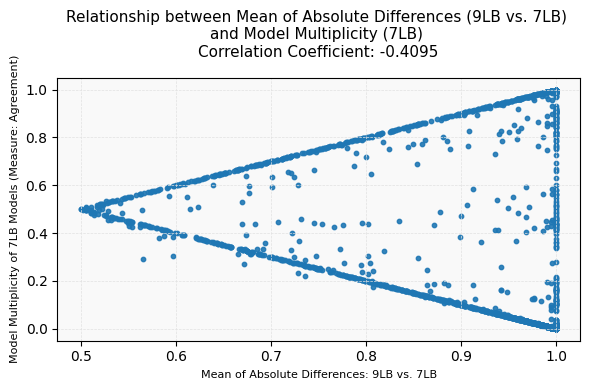

Correlation: -0.3937


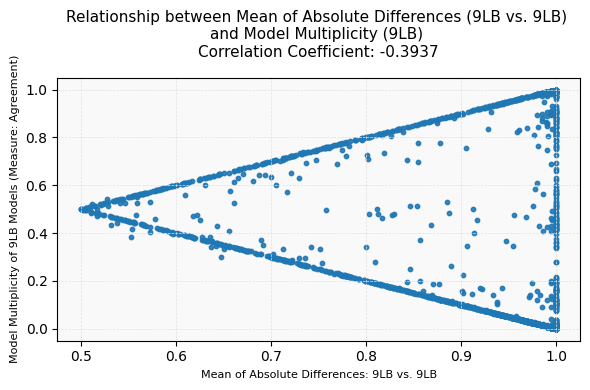

Correlation: -0.4504


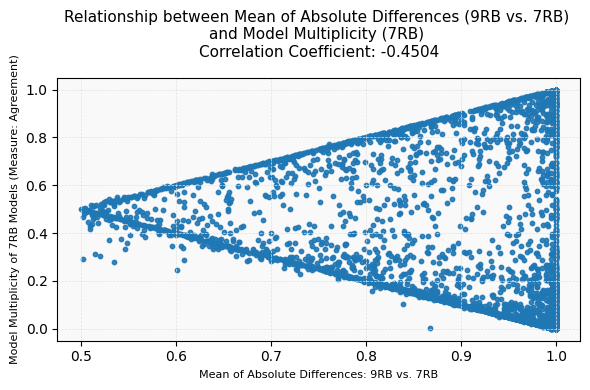

Correlation: -0.4307


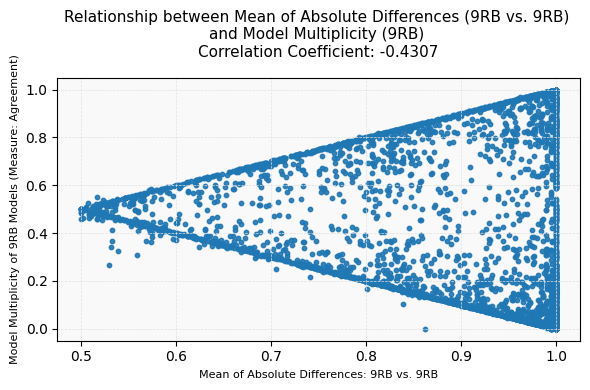

In [14]:
model_types = ['LB', 'RB']
comparison_keys = {
    '2vs7': '7',
    '2vs9': '9'
}

correlations = {}

for model_type in model_types:
    for comparison_key, base_model in comparison_keys.items():
        model_multiplicity = model_multiplicity_LB if model_type == 'LB' else model_multiplicity_RB
        
        correlations[f'{comparison_key}_{model_type}'] = correl_agreement_differences(
            model_multiplicity=model_multiplicity[base_model],
            combined_mean_of_abs_diff_df=combined_mean_of_abs_diff_df,
            model_type=model_type,
            base_model=base_model,
            comparison_key=comparison_key
        )